# Predicting Hazardous Asteroids

### What

NASA (National Aeronautics and Space Administration) is a world-renown organization headquartered in the United States.  The organization was created during the Space Race with Russia, in response to Sputnik 1 being launched into orbit around Earth.  Since then, NASA has landed people on the moon, rovers on Mars, telescopes into deep space, built (with international partnerships) a space station, and is still working to develop new technologies every day.  Part of their research takes a look at asteroids and attempts to determine if asteroids are hazardous or safe to Earth, so that we can take proper action should it be necessary.  The data used in this project comes from [Kaggle](https://www.kaggle.com/shrutimehta/nasa-asteroids-classification), but originates from NASA.

This data contains 40 variables which can be summarized as follows:

- The first two columns contain identical identifier values and are not too important or beneficial for a model. 
- The next feature is the absolute magnitude which looks looks at the brightness of an celestial object, according to the definition of absolute magnitude, as it would be seen at a distance of 10 parsecs (equal to 1.9174E+14 miles).  
- The next set of features are related to the diameter of asteroids.  Estimates are made in kilometers (km), meters (m), miles (mi), and feet (ft), with data for the maximum and minimum of each distance.  
- There are two columns addressing the date asteroids will approach Earth, by date and periods (epoch).  
- Features also include the speed of the asteroid, the distance from the earth the asteroid will pass, measured in astronomical, lunar, km, and mi units.  
- There are a number of columns dealing with the orbit pattern including the orbital period, perihelion distance, aphelion distance, eccentricity and the like.

There is one target in the 40 columns:

- The target variable is `hazardous` column, showing whether the asteroid is hazardous or not, based on size, speed, and orbit.
  
### Why

My grandfather worked for NASA during the Apollo missions.  This alone got me interested in a career in aeronautics, as well as witnessing SpaceX's many successes (and failures) and eventual partnership with NASA to launch American astronauts from American soil.  Today, my interest in space continues to grow and one of my goals is to work for an aeronautics company in the future.  Chances of me getting that a role like that are slim, right now, so the best thing I can do is work with data they provide to continue building my skills and experience.

Let's get started!

## Imports

First, we will import "global" packages that we will use throughout our code. We will import `pandas`, `numpy`, `seaborn`, `matplotlib`, and various sklearn libraries.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

Thanks to this data coming from Kaggle, there are no special steps or attributes necessary to load data into a data frame.  We can just use the `read_csv()` function included in the Pandas library.

In [13]:
asteroids = pd.read_csv("nasa.csv")

### Understand data

Now that the data has been loaded, let's take a run-down of contents.  Again, this data comes from Kaggle and thus has already been preprocessed, but we might want to do more to make it our own.  We can use `.info()` to get information on the columns.

In [14]:
# view basic info about columns
asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Each column has the same number of non-null rows which matches the number of rows the dataframe contains (see RangeIndex value at the top of the result pane).  That means there are likely no nulls in the data.  We can see here that there are four (4) columns with the `object` data type and five (5) columns with the `int64` data type.  Let's look at what these columns contain to see if they are helpful. We already plan on dropping the first two `int64` columns, but we will take a look to understand why. We will look at the others following in order, for readability.  

First, `Neo Reference ID`.
As mentioned before, these values just identify asteroids.  Interesting enough, if you put `.sum()` at the end, it will give you the sum of the column, adding each value together.  That is not the interesting part, as that should be obvious.  What is interesting is if you add `.sum()` to `.unique()` you get a smaller value when you would expect the same value.  This means some asteroids can be found more than once in this data set.  We might want to remove duplicates as they may throw the model off or train it too well. 

The `Name` column should contain the same values, but we can check just to make sure.
Sure enough, as expected, both `Neo Reference ID` and `Name` contain the same values.  We can drop these columns after we use them to remove duplicates.  

Let's look at `Close Approach Date`.
We don't have access to the metadata, but from the column name, `Close Approach Date` is most likely the date the asteroid will pass closest to the earth.  While it might be interesting to see if there is a pattern in dates relating to if an asteroid is hazardous or not, that exploration is for another project.  If we wanted to use this column, we could encode it, but that would result in over 4000 new columns.  Instead of doing that, for this project, we will drop this column. 

Let's look at `Epoch Date Close Approach`.
There are a number of unique values, but it might be the `Close Approach Date` in epoch format.  Since we are not completely sure, we will drop this column too.  

Let's look at `Orbiting Body`.
Looking at the data in the `Orbiting Body` column, we can tell that the value is the body the asteroid is orbiting.  Now, basic knowledge of the solar system will tell us that we (Earth) orbit the sun, as does everything else in our the solar system.  We then have an idea of what this column will contain for the values we cannot see.  When `.unique()` argument, we are able to find each distinct value in a column.  Having 4686 rows with the same value  ('Earth') seems odd, but since this data is determining if an asteroid is hazardous to Earth and not the entire solar system, it makes sense.  We can remove this column as it provides no helpful information for classification.

Let's take a look at `Orbit ID`.
If we were to look at a map of asteroids orbiting Earth, we would see rings going around the planet.  Without the meta data it is difficult to be certain what this column is trying to share with us, but it could be an identifier of an orbital pattern.  Because we don't know exactly what this column means, we will remove it from this classification project.

Let's look at `Orbit Determination Date`.
This column contains more dates but this column contains times as well.  Again, without meta data we cannot conclude for sure what the definition of this column is, but it might be pertaining to the date and time an asteroid completes an orbit around Earth.  Much like `Close Approach Date`, `Orbit Determination Date` is not helpful for this classification project, thought it might provide helpful insight for other projects.

Next, we will check out the `Orbit Uncertainity` column.
The column name has a spelling error, adding an extra 'i' so if we keeping it we could make that change.  However, we do not have much information about this column and therefore we will not use it in this classification project.

Finally, let's look at `Equinox`.
The "equinox" is the time or date when the equator of the sun matches the equator of the earth, causing day and night to be equal lengths.  In this case, the values are obviously not in standard date and time, however they are in date and time.  This format is called the "standard equinox (and epoch)" where "J" stands for "Julian epoch" and "2000" refers to January 1, 2000, 12:00 Terrestrial Time ([more here](https://community.esri.com/t5/coordinate-reference-systems/drifting-of-the-celestial-sphere-what-is-j2000/ba-p/902058)).  This is a standard value being used since 1984 and is not helpful to determining if an asteroid is hazardous or not, so we will remove this column from our project.

None of the columns with an `object` or `int64` data type are helpful when determining if an asteroid is hazardous or not so we will drop them when we clean the data.

Also, earlier we mentioned removing the first two columns as they are identifiers and contain the exact same data.  We will do this in the next step as well.

[Code from Stack Overflow](https://stackoverflow.com/questions/48817592/how-to-drop-dataframe-columns-based-on-dtype)

[Help from Stack Overflow](https://stackoverflow.com/questions/44026832/valueerror-number-of-features-of-the-model-must-match-the-input/44028890#44028890)

### Automation

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def random_forest_class(data, dtypes_to_drop, nestimators, mdepth, target):
    """
    Input:
        data : str : path to data
        dtypes_to_drop : list : remove columns based on dtype
        nestimators : list : number of trees to build
        mdepth : np.arange int : range of depths
        target : str : target variable

    Output:
        cm : graph : confusion matrix
    """
    df = pd.read_csv(data)

    df = df.select_dtypes(exclude=dtypes_to_drop)

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, test_size=0.3
    )

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    rfc = RandomForestClassifier()

    parameters = {
        "n_estimators": [n for n in nestimators],
        "max_depth": [d for d in mdepth],
        "criterion": ("gini", "entropy"),
    }

    grid_search = GridSearchCV(rfc, parameters).fit(X_train, y_train)
    grid_search_data = pd.DataFrame(grid_search.cv_results_)

    best_model = grid_search_data.loc[:"mean_test_score"].max()

    best_rfc = RandomForestClassifier(
        n_estimators=best_model.param_n_estimators,
        max_depth=best_model.param_max_depth,
        criterion=best_model.param_criterion,
        n_jobs=-1,
        random_state=1,
    ).fit(X_train, y_train)

    sr = classification_report(y, best_rfc.predict(X))

    cm = confusion_matrix(y, best_rfc.predict(X))

    return sns.heatmap(cm, annot=True, fmt="d");

In [16]:
random_forest_class(
    data="nasa.csv",
    dtypes_to_drop=["object", "int64"],
    nestimators=(100, 1000),
    mdepth=np.arange(1, 5),
    target="Hazardous",
);

Looking at the confusion matrix, we can tell that this model, using 30 features, classified hazardous and non-hazardous asteroids fairly well.  

- The top left corner, the True Negative quadrant, shows us that the model accurately predicted non-hazardous asteroids 3930 times.
- The top right corner tells us that the model predicted two False Positives, hazardous asteroids, that it believed were non-hazardous.
- The bottom left corner, the False Negative quadrant, tells us that the model classified 13 asteroids as non-hazardous when they were actually hazardous.
- In the bottom right corner, the True Positive quadrant, we can see the model accurately predicted hazardous asteroids 742 times.

The score report tells us that the model predicted with 100% precision True (Hazardous) and False (Non-Hazardous) asteroids.
I had wanted to find how few features could be used, but when I tried to set `n_features` I kept getting an error, so unfortunately, I was unable to explore that.

## New Model

I had previously experimented with the BaggingClassifier in a previous project, but ended up not following through with it.  I wanted to attempt to use it again and felt this project was a good place to do so.  The bagging classifier, according to the text book, there are multiple rounds of bagging.  In each round, data is fit to a classifier, creating multiple random samples.  Once each classifier is fit to a bootstrap sample, they are combined using majority voting.  The results should be similar to the ones in the RandomForestClassification model above because Random Forests are actually special bagging classifiers.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

def bag_class(data, dtypes_to_drop, mdepth, nestimators, target):
    """
    Input:
        data : str : path to data
        dtypes_to_drop : list : remove columns based on dtype
        nestimators : list : number of trees to build
        mdepth : np.arange int : range of depths
        target : str : target variable

    Output:
        cm : graph : confusion matrix
    """
    df = pd.read_csv(data)

    df = df.select_dtypes(exclude=dtypes_to_drop)

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, test_size=0.3
    )

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    dt = DecisionTreeClassifier()

    tree_parameters = {
        "criterion": ("gini", "entropy"),
        "splitter": ("best", "random"),
        "max_depth": [d for d in mdepth],
    }

    grid_search_tree = GridSearchCV(dt, tree_parameters).fit(X_train, y_train)
    grid_search_tree_data = pd.DataFrame(grid_search_tree.cv_results_)

    best_model_tree = grid_search_tree_data.loc[:"mean_test_score"].max()

    best_tree = DecisionTreeClassifier(
        criterion=best_model_tree.param_criterion,
        splitter=best_model_tree.param_splitter,
        max_depth=best_model_tree.param_max_depth,
        random_state=1,
    ).fit(X_train, y_train)

    bag = BaggingClassifier()

    bag_params = {
        "n_estimators": [n for n in nestimators],
        "bootstrap": (True, False),
    }

    grid_search_bag = GridSearchCV(bag, bag_params).fit(X_train, y_train)
    grid_search_bag_data = pd.DataFrame(grid_search_bag.cv_results_)

    best_model_bag = grid_search_bag_data.loc[:"mean_test_score"].max()

    best_bag = BaggingClassifier(
        base_estimator=best_tree,
        n_estimators=best_model_bag.param_n_estimators,
        bootstrap=best_model_bag.param_bootstrap,
        n_jobs=-1,
        random_state=1,
    ).fit(X_train, y_train)

    sr = classification_report(y, best_bag.predict(X))

    cm = confusion_matrix(y, best_bag.predict(X))

    return sns.heatmap(cm, annot=True, fmt="d");

C:\Users\natha\AppData\Local\Temp\ipykernel_5804\3672053852.py:46: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_model_tree = grid_search_tree_data.loc[:"mean_test_score"].max()
C:\Users\natha\AppData\Local\Temp\ipykernel_5804\3672053852.py:65: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_model_bag = grid_search_bag_data.loc[:"mean_test_score"].max()


<AxesSubplot:>

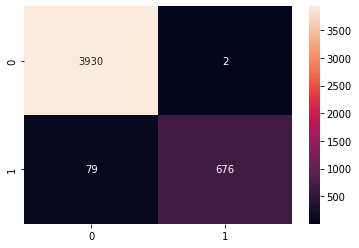

In [ ]:
bag_class(
    data="nasa.csv",
    dtypes_to_drop=["object", "int64"],
    mdepth=np.arange(1, 5),
    nestimators=(100, 1000),
    target="Hazardous",
)

Looking at the confusion matrix, we can tell that this model classified hazardous and non-hazardous asteroids fairly well.  

- The top left corner, the True Negative quadrant, shows us that the model accurately predicted non-hazardous asteroids 3930 times.
- The top right corner tells us that the model predicted 2 False Positives, hazardous asteroids, that it believed were non-hazardous.
- The bottom left corner, the False Negative quadrant, tells us that the model classified 75 asteroids as non-hazardous when they were actually hazardous.
- In the bottom right corner, the True Positive quadrant, we can see the model accurately predicted hazardous asteroids 680 times.

The score report tells us that the model predicted, with 100% precision, all True (Hazardous) and with 98% precision, all False (Non-Hazardous) asteroids.

The models had similar scores, but if I had to choose one of these models to use to predict if an asteroid was hazardous or not, I would use the RandomForestClassifier as it predicted asteroids more accurately than the BaggingClassifier.

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [ ]:
def gaussian(data, dtypes_to_drop, target, train_size):
    """
    input:
        data : str : data file
        dtypes_to_drop : str : data type of columns to drop
        target : str : variable to solve for
    output:
        cm : plot : confusion matrix
    """
    df = pd.read_csv(data)

    df = df.select_dtypes(exclude=dtypes_to_drop)

    X = df.drop(target, axis =1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=train_size, random_state = 1)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    gb = GaussianProcessClassifier().fit(X_train, y_train)

    cm = confusion_matrix(y, gb.predict(X))

    return sns.heatmap(cm, annot=True, fmt="d");

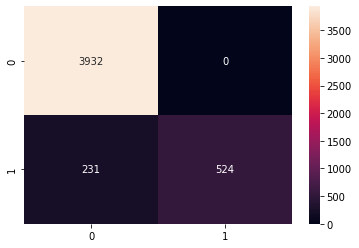

In [ ]:
gaussian("nasa.csv", ["object", "int"], "Hazardous", .7);